In [1]:
# 필요한 패키지 참조

from pandas import melt, merge,read_excel, DataFrame, pivot_table, to_datetime, concat
import numpy as np
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime,timedelta 
import pandas as pd

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [3]:
origin = read_excel('C:/Users/J/Desktop/미세먼지data/필수데이터_전처리코드/2.지하역사미세먼지_2208~2308.xlsx')
origin

,Unnamed: 0,지점명,호선,위치,측정일자,일평균
0,0.0,청량리,1호선,서울,20220801,22.6
1,1.0,청량리,1호선,서울,20220802,21.5
2,2.0,청량리,1호선,서울,20220803,26.4
3,3.0,청량리,1호선,서울,20220804,25.0
4,4.0,청량리,1호선,서울,20220805,25.8
...,...,...,...,...,...,...
126261,20636.0,관악산(서울대),신림선,서울,20230827,18.7
126262,20637.0,관악산(서울대),신림선,서울,20230828,9.4
126263,20638.0,관악산(서울대),신림선,서울,20230829,8.6
126264,20639.0,관악산(서울대),신림선,서울,20230830,10.3


In [4]:
df = origin[['지점명','호선','측정일자','일평균']]
df2 = df.sort_values('일평균')
# 결측치 확인 및 제거
empty = df2.isnull()
empty
empty.sum()
df3 = df2.dropna()
# 일평균 순으로 정렬
df4 = df3.sort_values('측정일자')
df4['측정일자']=df4['측정일자'].astype('str')
df4['측정일자']=to_datetime(df4['측정일자'])
df4

#1~9호선만 추출

tdf = df4.query('호선=="1호선" or 호선=="2호선" or 호선=="3호선" or 호선=="4호선" or 호선=="5호선" or 호선=="6호선" or 호선=="7호선" or 호선=="8호선" or 호선=="9호선"')
tdf['월평균']=44
tdf['12~3월평균대비%']=(tdf['일평균']-tdf['월평균'])/tdf['월평균']*100
tdf1 = tdf[tdf['12~3월평균대비%']>=0]
tdf1['12~3월평균대비%']=tdf1['12~3월평균대비%'].astype('int')
tdf2 = tdf1[(tdf1['측정일자'] >= '2022-12-01') & (tdf1['측정일자'] <= '2023-03-31')]
tdf2.to_excel('산점도데이터_지하역사.xlsx')

C:\Users\J\AppData\Local\Temp\ipykernel_15484\1442353454.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['월평균']=44
C:\Users\J\AppData\Local\Temp\ipykernel_15484\1442353454.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['12~3월평균대비%']=(tdf['일평균']-tdf['월평균'])/tdf['월평균']*100
C:\Users\J\AppData\Local\Temp\ipykernel_15484\1442353454.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [5]:
tdf

,지점명,호선,측정일자,일평균,월평균,12~3월평균대비%
8460,고속터미널,9호선,2022-08-01,27.2,44,-38.181818
4958,공덕,6호선,2022-08-01,20.0,44,-54.545455
5684,하계,7호선,2022-08-01,17.7,44,-59.772727
4039,광나루,5호선,2022-08-01,29.7,44,-32.500000
3951,장한평,5호선,2022-08-01,27.5,44,-37.500000
...,...,...,...,...,...,...
123475,삼성중앙,9호선,2023-08-31,35.5,44,-19.318182
119324,김포공항,5호선,2023-08-31,22.3,44,-49.318182
116336,청량리,1호선,2023-08-31,35.5,44,-19.318182
116429,동묘,1호선,2023-08-31,35.6,44,-19.090909


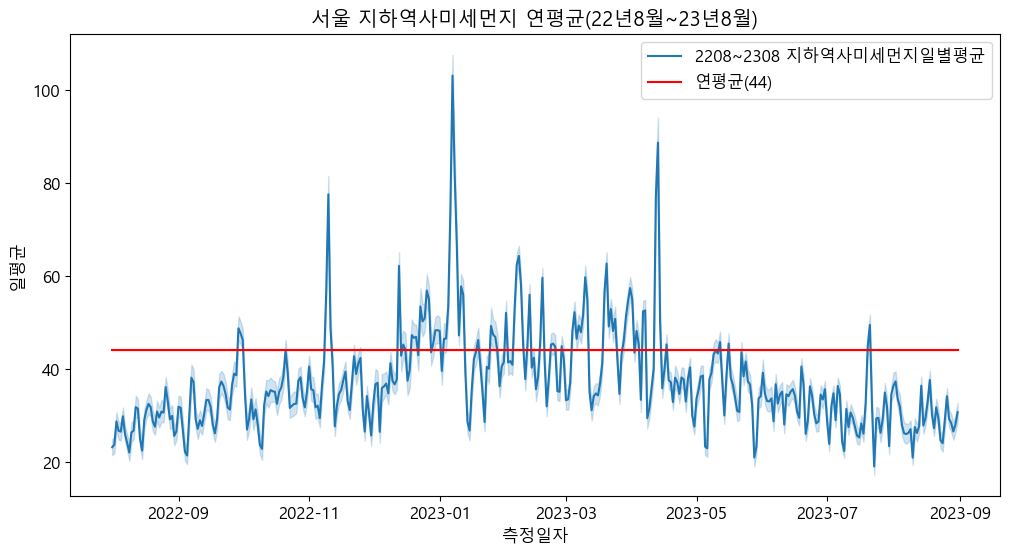

In [6]:
# 1년 lineplot

# lineplot

sns.lineplot(x=tdf['측정일자'],y=tdf['일평균'],label='2208~2308 지하역사미세먼지일별평균')
sns.lineplot(x=tdf['측정일자'],y=44,label='연평균(44)', color='#ff0000')

plt.title("서울 지하역사미세먼지 연평균(22년8월~23년8월)")
plt.show()
plt.close()


In [7]:
# 도수분포표 그리기

hist, bins = np.histogram(tdf['일평균'],15)
# print(hist)
# print(bins)

s = len(hist)
for i in range(0,s):
    if i+1 <s:
        tpl = '%d이상 %d미만: %d개'
    else:
        tpl = '%d이상 %d미만: %d개'

    print(tpl % (bins[i],bins[i+1],hist[i]))

0이상 25미만: 35272개
25이상 51미만: 48980개
51이상 77미만: 14848개
77이상 103미만: 3445개
103이상 128미만: 1035개
128이상 154미만: 418개
154이상 180미만: 163개
180이상 206미만: 53개
206이상 231미만: 20개
231이상 257미만: 19개
257이상 283미만: 6개
283이상 309미만: 3개
309이상 334미만: 1개
334이상 360미만: 0개
360이상 386미만: 1개


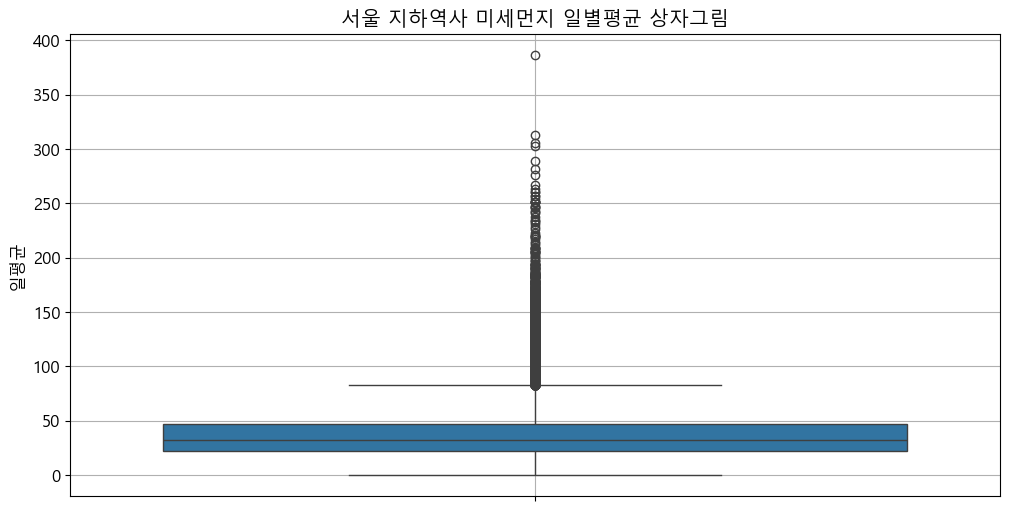

In [8]:
# 상자그림
plt.figure()
sns.boxplot(data=tdf['일평균'])
plt.grid()
plt.title("서울 지하역사 미세먼지 일별평균 상자그림")
plt.show()
plt.close()

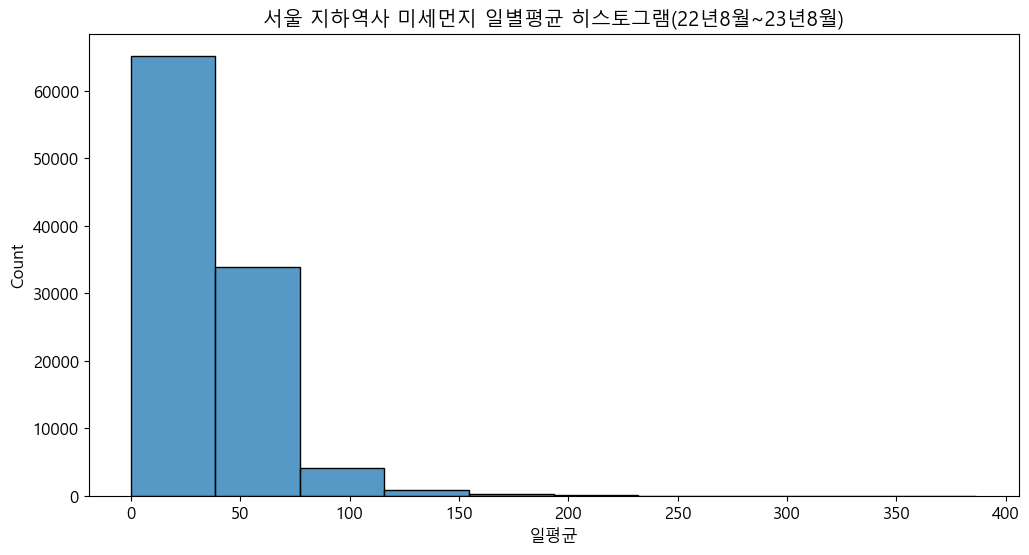

In [9]:
# 히스토그램

sns.histplot(data=tdf, x='일평균', bins=10)


plt.title("서울 지하역사 미세먼지 일별평균 히스토그램(22년8월~23년8월)")
plt.show()
plt.close()

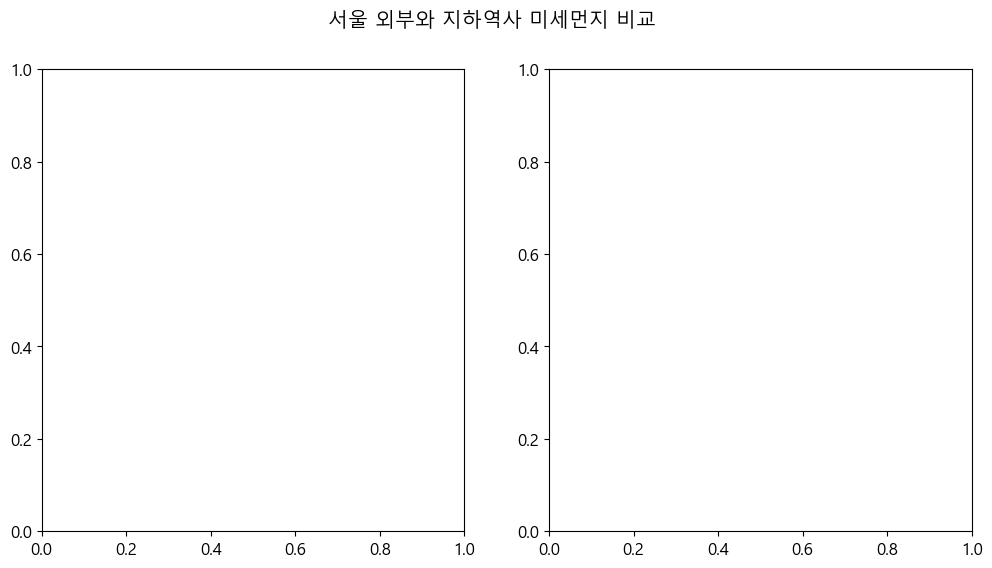

In [10]:
# 외부와 지하역사 동시 비교할 수 있는 서브플롯

fig,ax=plt.subplots(1,2)
fig.suptitle('서울 외부와 지하역사 미세먼지 비교')
plt.show()
plt.close()

In [11]:
origin_out = read_excel('C:/Users/J/Desktop/미세먼지data/필수데이터_전처리코드/외부미세먼지최종_(2208~2308).xlsx')


In [12]:
df_out = origin_out[['년월일','지역','일별평균']]
# 일별평균 순으로 정렬
df2_out = df_out.sort_values('일별평균')
df2_out['일별평균']=df2_out['일별평균'].astype('int')
tdf_out = df2_out
tdf_out1=tdf_out.rename(columns={'년월일':'측정일자'})
tdf_out1
# 1년 전체 평균 18

,측정일자,지역,일별평균
9806,2023-08-10,서울 서초구,1
2006,2022-10-06,서울 서초구,1
844,2022-09-05,서울 강북구,1
9804,2023-08-08,서울 서초구,1
457,2022-09-01,서울 서초구,1
...,...,...,...
4154,2023-01-07,서울 금천구,96
3962,2023-01-07,서울 강동구,97
4665,2023-01-07,서울 중구,99
4505,2023-01-07,서울 양천구,99


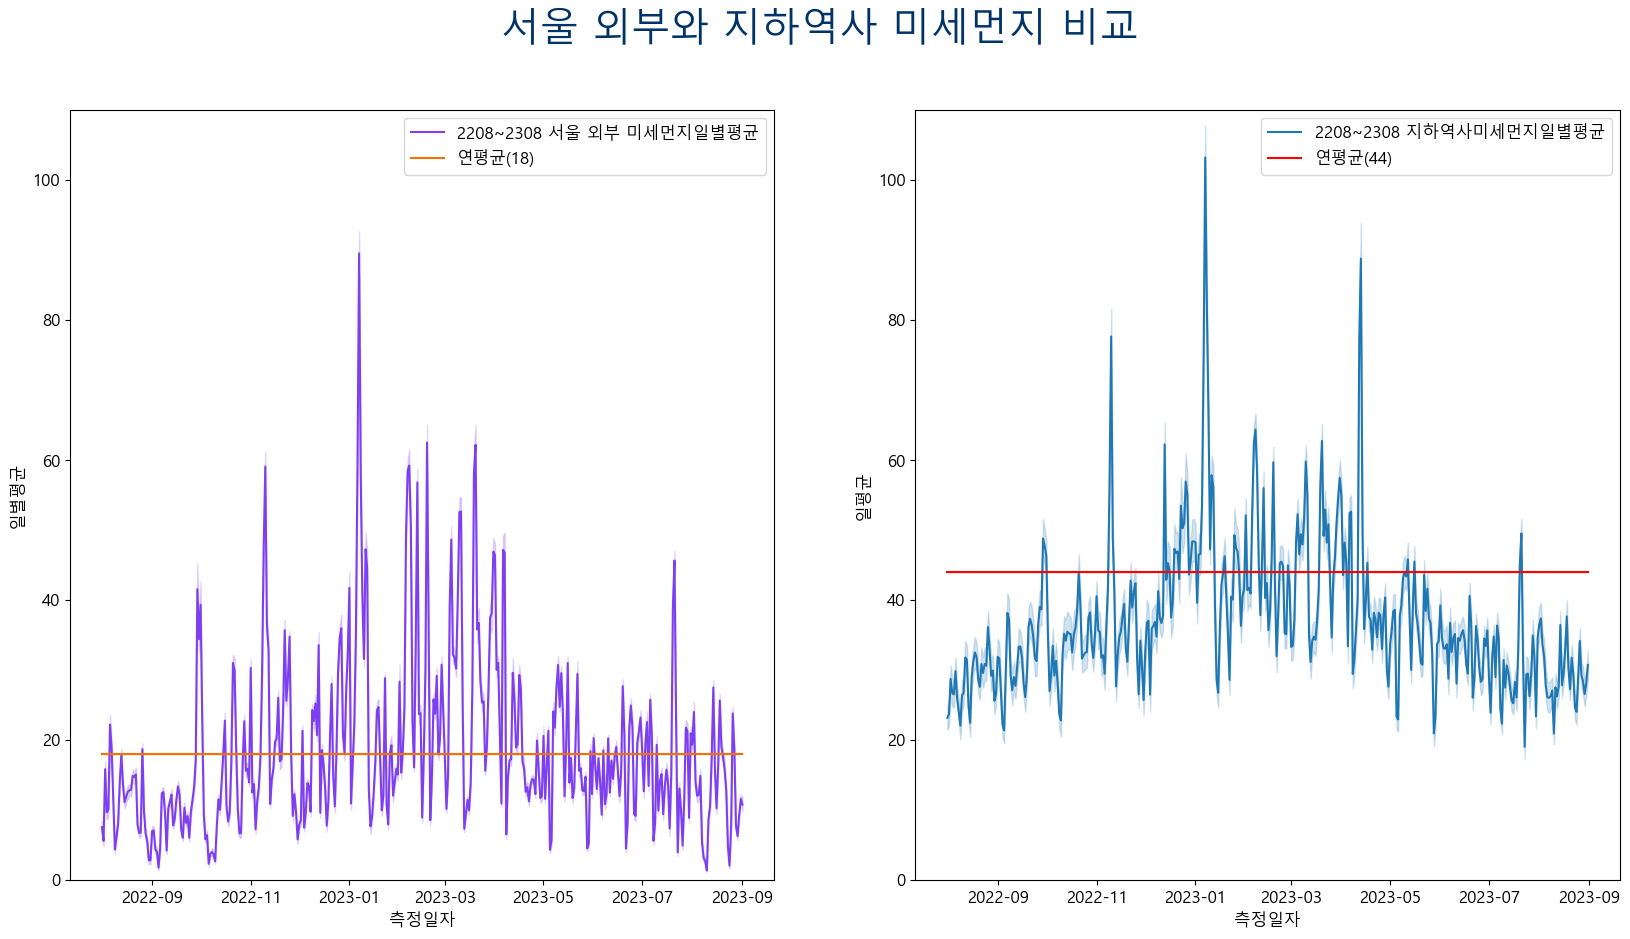

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('서울 외부와 지하역사 미세먼지 비교',fontsize=28, color='#003366')
sns.lineplot(x=tdf['측정일자'],y=tdf['일평균'],label='2208~2308 지하역사미세먼지일별평균',ax=ax2)
sns.lineplot(x=tdf['측정일자'],y=44,label='연평균(44)', color='#ff0000',ax=ax2)
ax1.set_ylim(0,110)
ax2.set_ylim(0,110)
sns.lineplot(x=tdf_out1['측정일자'],y=tdf_out1['일별평균'],color='#7e3ff2',label='2208~2308 서울 외부 미세먼지일별평균',ax=ax1)
sns.lineplot(x=tdf_out1['측정일자'],y=18,label='연평균(18)', color='#f47101',ax=ax1)


plt.show()
plt.close()

In [14]:
# 12~3월 월별 평균 구하기

df5 = tdf[(tdf['측정일자'] >= '2022-12-01') & (tdf['측정일자'] <= '2023-03-31')]
df5
df5['월']=df5['측정일자'].dt.month
df5['일평균']=df5['일평균'].astype('int')
df6 = df5[['일평균','월']]
df6
df7 = df6.groupby('월').mean()
df7
df8 = df7.rename(columns={'일평균':'월별평균'})


df8['월별평균']=df8['월별평균'].astype('int')
df8.describe()
# # 12~3월 평균은 44.5  -> 44



C:\Users\J\AppData\Local\Temp\ipykernel_15484\2567528180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['월']=df5['측정일자'].dt.month
C:\Users\J\AppData\Local\Temp\ipykernel_15484\2567528180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['일평균']=df5['일평균'].astype('int')


,월별평균
count,4.000000
mean,44.500000
std,2.081666
min,42.000000
25%,43.500000
50%,44.500000
75%,45.500000
max,47.000000


In [15]:
# 23년 1월 7일         12~3월 평균 44보다 얼마나 더 높냐가 핵심

df0107 = tdf[tdf['측정일자']=='20230107']
df0107['일평균']=df0107['일평균'].astype('int')
df0107


C:\Users\J\AppData\Local\Temp\ipykernel_15484\4126125259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0107['일평균']=df0107['일평균'].astype('int')


,지점명,호선,측정일자,일평균,월평균,12~3월평균대비%
49147,역삼,2호선,2023-01-07,67,44,53.636364
51109,혜화,4호선,2023-01-07,88,44,100.909091
48159,동대문,1호선,2023-01-07,94,44,114.090909
51786,목동,5호선,2023-01-07,110,44,151.136364
50683,명동,4호선,2023-01-07,119,44,171.590909
...,...,...,...,...,...,...
56419,석촌고분,9호선,2023-01-07,76,44,74.090909
51601,동대문역사문화공원,5호선,2023-01-07,123,44,181.136364
50313,연신내,3호선,2023-01-07,43,44,-0.227273
54362,상도,7호선,2023-01-07,114,44,160.681818


In [28]:
df0107
df0107_1 = df0107.query('지점명=="녹번" or 지점명=="약수" or 지점명=="마포" or 지점명=="공덕" or 지점명=="신사" or 지점명=="마포구청" or 지점명=="석계" or 지점명=="마들" or 지점명=="중계" or 지점명=="공릉" or 지점명=="군자" or 지점명=="내방" or 지점명=="숭실대입구" or 지점명=="대림" or 지점명=="남구로"')
df0107_1.sort_values('호선').reset_index(drop=True)
df0107_2 = df0107_1.reset_index(drop=True)
df0107_2
df0107_3 = df0107_2.drop(df0107_2.index[6]).reset_index(drop=True)
df0107_3
df0107_4 = df0107_3.drop(df0107_3.index[15])
df0107_4
gu_list = ['구로구'
,'마포구'
,'마포구'
,'노원구'
,'중구'
,'노원구'
,'영등포구'
,'노원구'
,'마포구'
,'노원구'
,'은평구'
,'동작구'
,'강남구'
,'광진구'
,'마포구']

df0107_4['자치구']=['구로구'
,'마포구'
,'마포구'
,'노원구'
,'중구'
,'노원구'
,'영등포구'
,'노원구'
,'마포구'
,'노원구'
,'은평구'
,'동작구'
,'강남구'
,'광진구'
,'마포구']
df0107_4['구_일평균']=[94,96,96,92,99,92,95,92,96,92,89,95,87,81,96]
df0107_4['구_12~3월평균'] = 25
df0107_4['구_12~3월평균대비%'] = (df0107_4['구_일평균']-df0107_4['구_12~3월평균'])/df0107_4['구_12~3월평균']*100
df0107_4


,지점명,호선,측정일자,일평균,월평균,12~3월평균대비%,자치구,구_일평균,구_12~3월평균,구_12~3월평균대비%
0,남구로,7호선,2023-01-07,162,44,268.863636,구로구,94,25,276.0
1,공덕,5호선,2023-01-07,97,44,121.136364,마포구,96,25,284.0
2,마포구청,6호선,2023-01-07,161,44,267.727273,마포구,96,25,284.0
3,공릉,7호선,2023-01-07,119,44,172.045455,노원구,92,25,268.0
4,약수,3호선,2023-01-07,75,44,71.136364,중구,99,25,296.0
5,석계,6호선,2023-01-07,116,44,164.772727,노원구,92,25,268.0
6,대림,7호선,2023-01-07,89,44,103.636364,영등포구,95,25,280.0
7,마들,7호선,2023-01-07,102,44,132.954545,노원구,92,25,268.0
8,공덕,6호선,2023-01-07,71,44,62.727273,마포구,96,25,284.0
9,중계,7호선,2023-01-07,102,44,131.818182,노원구,92,25,268.0


In [34]:
df_out_ratio = df0107_4[['자치구','구_12~3월평균대비%']]
df_sub_ratio = df0107_4[['자치구','12~3월평균대비%']]
df_out_ratio1 = df_out_ratio.groupby('자치구').mean()
df_out_ratio1
df_sub_ratio1 = df_sub_ratio.groupby('자치구').mean()
df_out_ratio1

df_final_ratio = merge(df_out_ratio1,df_sub_ratio1,left_index=True,right_index=True)
df_final_ratio
df_final_ratio=df_final_ratio.rename(columns={'12~3월평균대비%':'지하역사_12~3월평균대비%'})
df_final_ratio1 = df_final_ratio.reset_index()
df_final_ratio1.describe()

,구_12~3월평균대비%,지하역사_12~3월평균대비%
count,9.0,9.000000
mean,268.0,157.853535
std,22.0,61.996440
min,224.0,71.136364
25%,256.0,143.238636
50%,276.0,147.045455
75%,280.0,150.397727
max,296.0,268.863636


In [31]:
df_final_ratio2 = melt(df_final_ratio1,
                 id_vars='자치구',
                 value_vars=['구_12~3월평균대비%','지하역사_12~3월평균대비%'],
                 var_name='미세먼지측정치(230107)',
                 value_name='12~3월평균대비%')


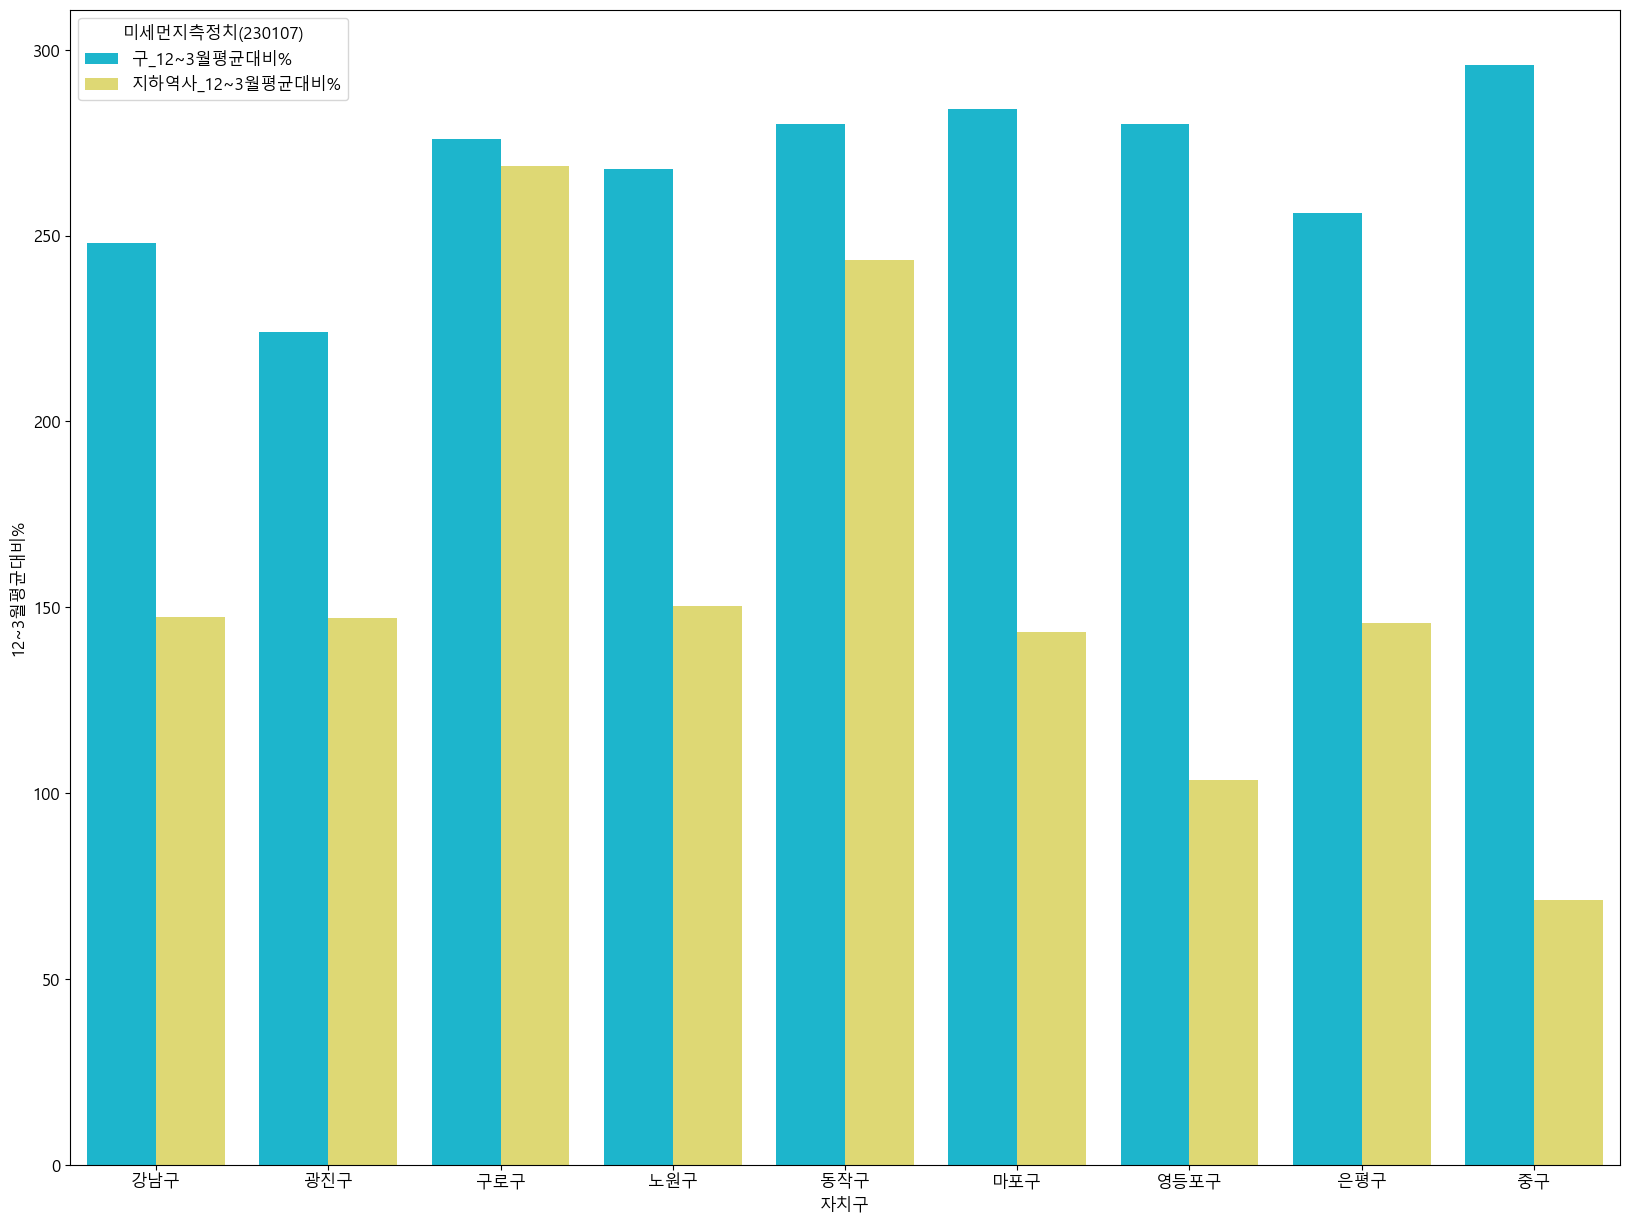

In [33]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_final_ratio2,x='자치구',y='12~3월평균대비%',hue='미세먼지측정치(230107)',estimator='median',palette=['#00cbe9','#efe863'])
#sns.lineplot(x=df_final_ratio2['자치구'],y=44,label='지하역사_12~3월_평균', color='#e77200')
#sns.lineplot(x=df_final2['자치구'],y=25,label='구_12~3월_평균', color='#0037c6')

plt.show()
plt.close()

In [17]:
df_out_final = df0107_4[['자치구','구_일평균']]
df_sub_final = df0107_4[['자치구','일평균']]
df_out_final1 = df_out_final.groupby('자치구').mean()
df_out_final1
df_sub_final1 = df_sub_final.groupby('자치구').mean()
df_out_final1

df_final = merge(df_out_final1,df_sub_final1,left_index=True,right_index=True)

df_final=df_final.rename(columns={'일평균':'지하역사_일평균'})
df_final1 = df_final.reset_index()
df_final1

,자치구,구_일평균,지하역사_일평균
0,강남구,87.0,108.00
1,광진구,81.0,108.00
2,구로구,94.0,162.00
3,노원구,92.0,109.75
4,동작구,95.0,151.00
5,마포구,96.0,106.50
6,영등포구,95.0,89.00
7,은평구,89.0,108.00
8,중구,99.0,75.00


In [18]:
df_final2 = melt(df_final1,
                 id_vars='자치구',
                 value_vars=['구_일평균','지하역사_일평균'],
                 var_name='미세먼지측정치(230107)',
                 value_name='측정치')


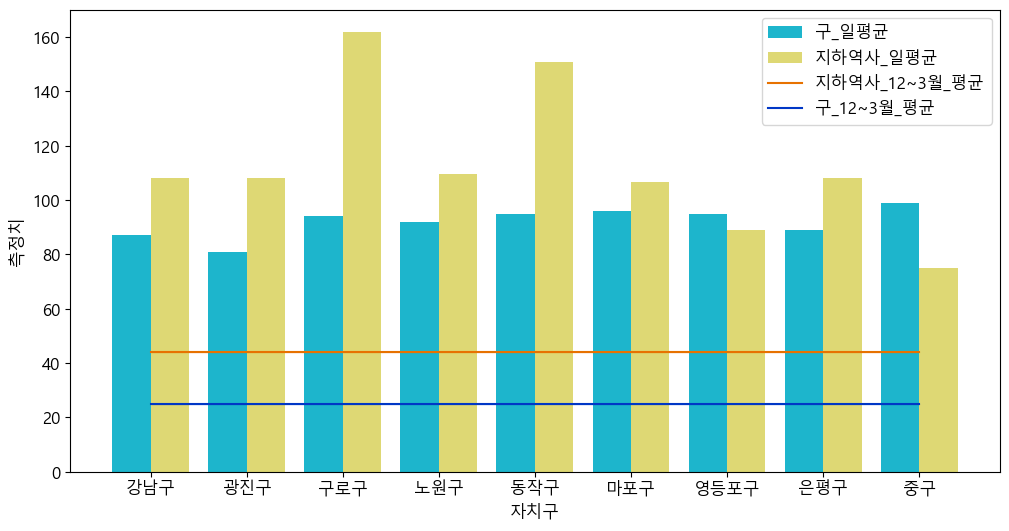

In [19]:
plt.figure()
sns.barplot(data=df_final2,x='자치구',y='측정치',hue='미세먼지측정치(230107)',estimator='median',palette=['#00cbe9','#efe863'])
sns.lineplot(x=df_final2['자치구'],y=44,label='지하역사_12~3월_평균', color='#e77200')
sns.lineplot(x=df_final2['자치구'],y=25,label='구_12~3월_평균', color='#0037c6')

plt.show()
plt.close()

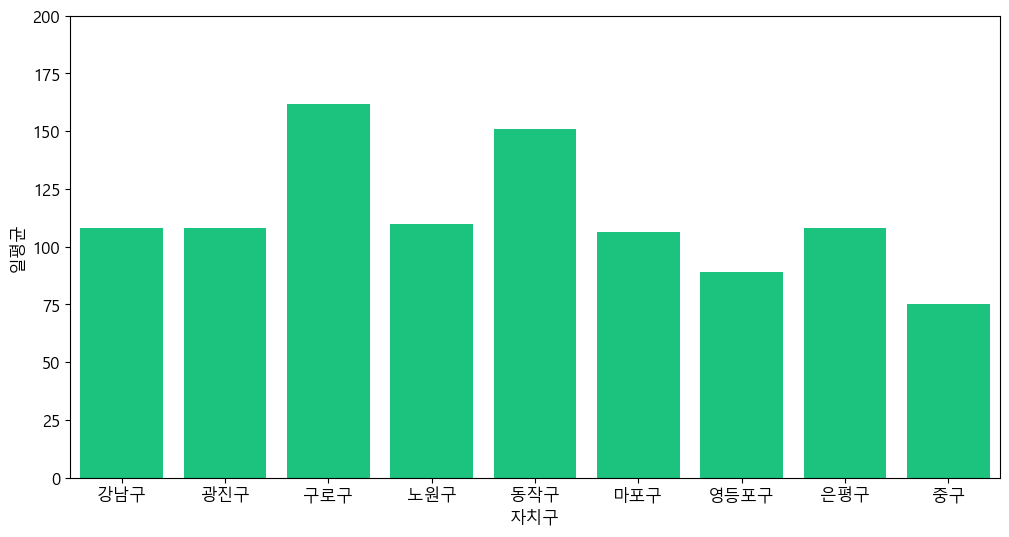

In [20]:
# 자치구별 오른 % 

plt.figure()
sns.barplot(data=df_out_final1, x=df_out_final1.index, y=df_sub_final1['일평균'],color='#00df83')

plt.ylim(0,200)
plt.show()
plt.close()

In [21]:
df0107_4['12월~3월평균']=44
df0107_4['12~3월평균대비오른%'] = (df0107_4['일평균']-df0107_4['12월~3월평균'])/df0107_4['12월~3월평균']*100
df0107_4['12~3월평균대비오른%']=df0107_4['12~3월평균대비오른%'].astype('int')
df0107_5 = df0107_4.rename(columns={'지점명':'역명'})
df0107_5

,역명,호선,측정일자,일평균,월평균,12~3월평균대비%,자치구,구_일평균,12월~3월평균,12~3월평균대비오른%
0,남구로,7호선,2023-01-07,162,44,268.863636,구로구,94,44,268
1,공덕,5호선,2023-01-07,97,44,121.136364,마포구,96,44,120
2,마포구청,6호선,2023-01-07,161,44,267.727273,마포구,96,44,265
3,공릉,7호선,2023-01-07,119,44,172.045455,노원구,92,44,170
4,약수,3호선,2023-01-07,75,44,71.136364,중구,99,44,70
5,석계,6호선,2023-01-07,116,44,164.772727,노원구,92,44,163
6,대림,7호선,2023-01-07,89,44,103.636364,영등포구,95,44,102
7,마들,7호선,2023-01-07,102,44,132.954545,노원구,92,44,131
8,공덕,6호선,2023-01-07,71,44,62.727273,마포구,96,44,61
9,중계,7호선,2023-01-07,102,44,131.818182,노원구,92,44,131


In [22]:
# 도수분포표 그리기

hist, bins = np.histogram(df0107_4['12~3월평균대비오른%'],5)
# print(hist)
# print(bins)

s = len(hist)
for i in range(0,s):
    if i+1 <s:
        tpl = '%d이상 %d미만: %d개'
    else:
        tpl = '%d이상 %d미만: %d개'

    print(tpl % (bins[i],bins[i+1],hist[i]))

61이상 102미만: 3개
102이상 143미만: 4개
143이상 185미만: 5개
185이상 226미만: 0개
226이상 268미만: 3개


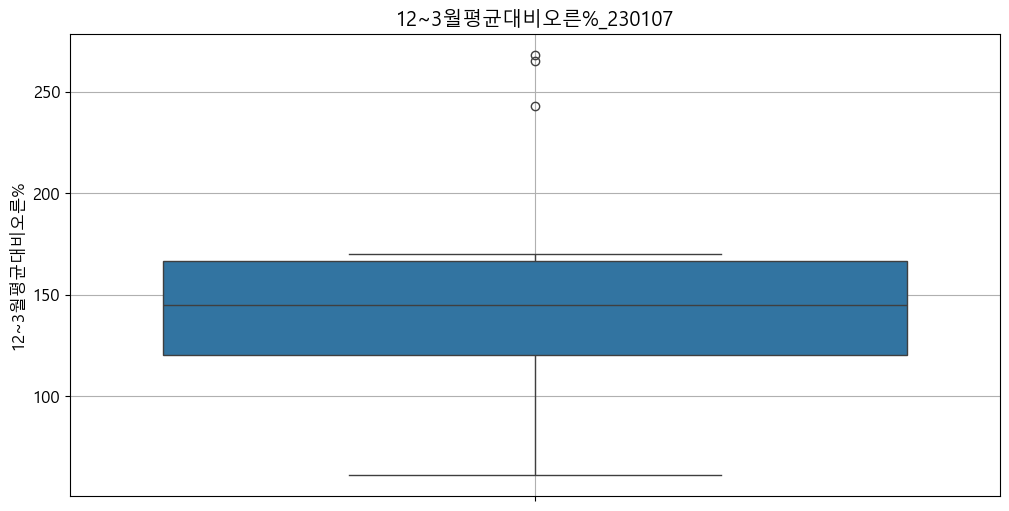

In [23]:
# 상자그림
plt.figure()
sns.boxplot(data=df0107_4['12~3월평균대비오른%'])
plt.grid()
plt.title("12~3월평균대비오른%_230107")
plt.show()
plt.close()

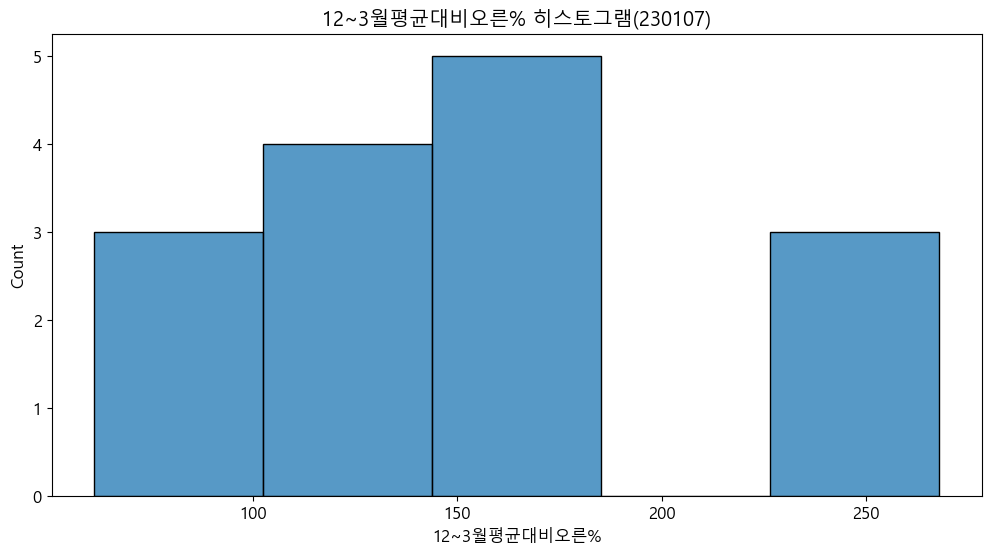

In [24]:
#히스토그램


sns.histplot(data=df0107_4, x='12~3월평균대비오른%', bins=5)


plt.title("12~3월평균대비오른% 히스토그램(230107)")
plt.show()
plt.close()

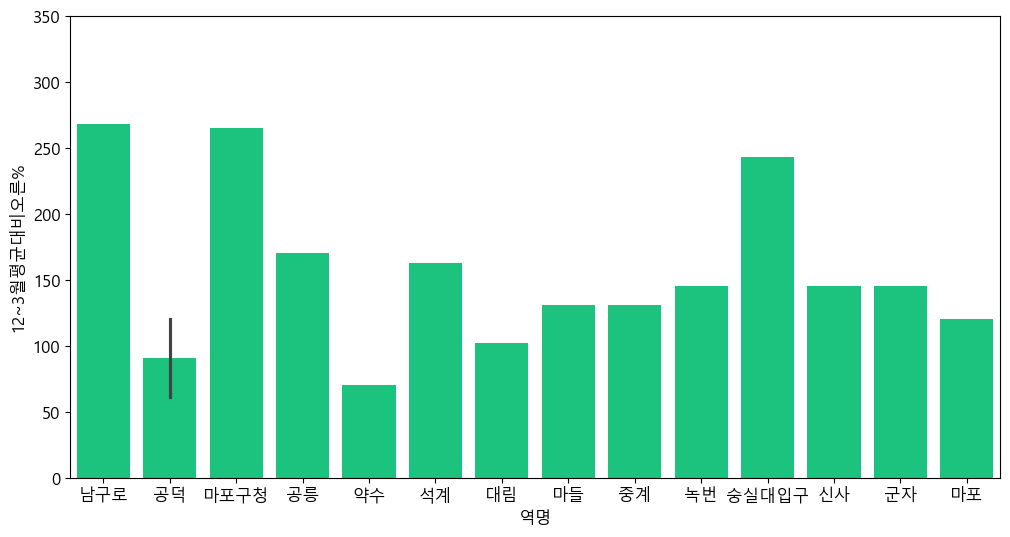

In [25]:
# 지하철역별 오른 % 

plt.figure()
sns.barplot(data=df0107_5, x=df0107_5['역명'], y=df0107_5['12~3월평균대비오른%'],color='#00df83')
plt.ylim(0,350)
plt.show()
plt.close()